<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

##  Same preprocessing steps as Day8 task

In [64]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

In [65]:
loans = pd.read_csv('Training Data.csv')

In [66]:
loans.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [67]:
loans.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [68]:
loans.shape

(252000, 13)

In [69]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [70]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [71]:
loans.shape

(252000, 13)

In [72]:
loans.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [73]:
loans.duplicated().sum()

0

In [74]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(loans, loans['Risk_Flag']):
    strat_train_set = loans.loc[train_index]
    strat_valid_set = loans.loc[valid_index]

In [75]:
strat_train_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
13714,13715,8132252,72,7,single,rented,no,Mechanical_engineer,Karaikudi,Tamil_Nadu,6,13,0
51718,51719,7915651,64,8,single,rented,no,Psychologist,Jamnagar,Gujarat,3,12,0
99982,99983,6272029,49,12,single,rented,no,Drafter,Sagar,Madhya_Pradesh,7,10,0
107150,107151,1832125,54,13,single,rented,yes,Scientist,Vijayanagaram,Andhra_Pradesh,12,14,0
94564,94565,7954133,31,7,single,rented,yes,Drafter,Avadi,Tamil_Nadu,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197799,197800,5144485,55,4,single,rented,no,Secretary,Chapra,Bihar,4,13,0
228682,228683,9031799,49,5,single,rented,no,Architect,Bhimavaram,Andhra_Pradesh,4,10,0
114068,114069,1585215,64,9,single,rented,no,Politician,Karnal,Haryana,9,10,0
200681,200682,4784462,60,19,married,rented,yes,Economist,Durg,Chhattisgarh,9,14,0


In [76]:
strat_valid_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
73540,73541,1695876,58,6,single,rented,yes,Computer_hardware_engineer,Bhalswa_Jahangir_Pur,Delhi,6,13,0
106484,106485,3423010,74,3,single,rented,yes,Computer_hardware_engineer,Dehradun,Uttarakhand,3,10,0
164137,164138,9685641,63,5,single,rented,no,Psychologist,Tadipatri,Andhra_Pradesh,5,12,0
36524,36525,4806341,79,3,single,rented,no,Computer_operator,Panchkula,Haryana,3,13,0
233388,233389,195009,79,15,single,rented,yes,Librarian,Morbi,Gujarat,4,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174885,174886,8129321,22,16,single,rented,no,Physician,Thiruvananthapuram,Kerala,13,12,0
203158,203159,1839079,43,11,married,rented,no,Aviator,Bhubaneswar,Odisha,10,11,0
234667,234668,2606288,51,6,single,rented,no,Architect,Malegaon,Maharashtra,6,13,0
30812,30813,78418,35,18,single,rented,no,Air_traffic_controller,Bathinda,Punjab,12,12,0


In [77]:
Counter(strat_train_set.Risk_Flag)

Counter({0: 176803, 1: 24797})

In [78]:
Counter(strat_valid_set.Risk_Flag)

Counter({0: 44201, 1: 6199})

In [79]:
strat_train_set.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [80]:
strat_train_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)

In [81]:
for col in strat_train_set.select_dtypes('object').columns:
    print(strat_train_set[col].value_counts())
    print()

single     181079
married     20521
Name: Married/Single, dtype: int64

rented          185484
owned            10372
norent_noown      5744
Name: House_Ownership, dtype: int64

no     141131
yes     60469
Name: Car_Ownership, dtype: int64



In [82]:
X = strat_train_set[strat_train_set.columns.difference(['Risk_Flag'])]
y = strat_train_set.Risk_Flag

In [83]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Combined Random Sampling: Counter({0: 110501, 1: 88401})


In [84]:
strat_train_set = pd.DataFrame(np.c_[X_combined_sampling, y_combined_sampling], columns=list(X.columns) + ['Risk_Flag'])

In [85]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,70,11,4,yes,4,rented,6001312,single,0
1,30,11,2,yes,2,rented,859890,single,0
2,59,10,12,no,12,rented,6220997,single,0
3,45,10,4,yes,14,rented,1363933,single,0
4,68,10,7,no,7,rented,6402349,single,0


In [86]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  object
 1   CURRENT_HOUSE_YRS  198902 non-null  object
 2   CURRENT_JOB_YRS    198902 non-null  object
 3   Car_Ownership      198902 non-null  object
 4   Experience         198902 non-null  object
 5   House_Ownership    198902 non-null  object
 6   Income             198902 non-null  object
 7   Married/Single     198902 non-null  object
 8   Risk_Flag          198902 non-null  object
dtypes: object(9)
memory usage: 13.7+ MB


In [87]:
strat_train_set = strat_train_set.convert_dtypes()

In [88]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  Int64 
 1   CURRENT_HOUSE_YRS  198902 non-null  Int64 
 2   CURRENT_JOB_YRS    198902 non-null  Int64 
 3   Car_Ownership      198902 non-null  string
 4   Experience         198902 non-null  Int64 
 5   House_Ownership    198902 non-null  string
 6   Income             198902 non-null  Int64 
 7   Married/Single     198902 non-null  string
 8   Risk_Flag          198902 non-null  Int64 
dtypes: Int64(6), string(3)
memory usage: 14.8 MB


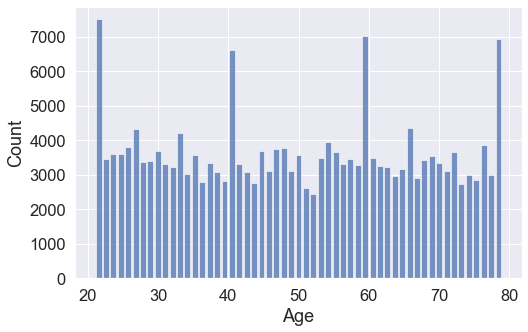

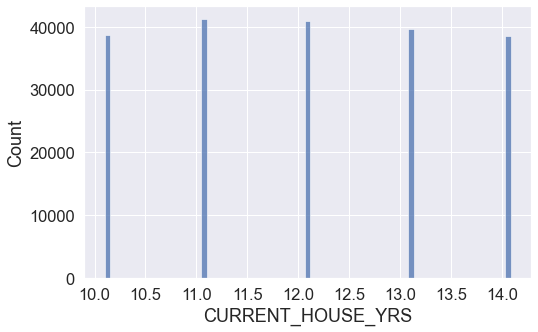

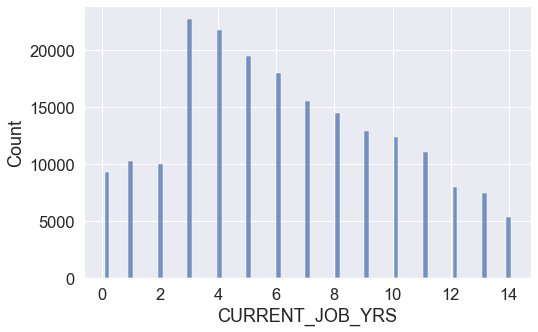

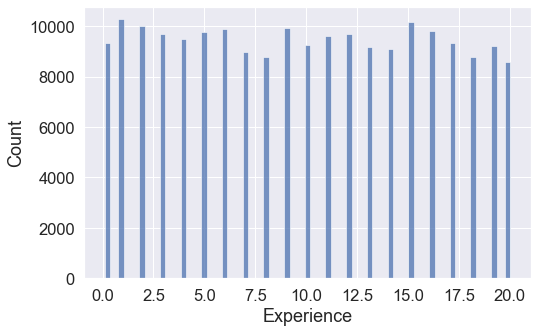

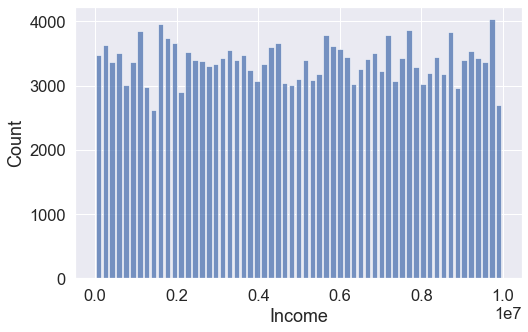

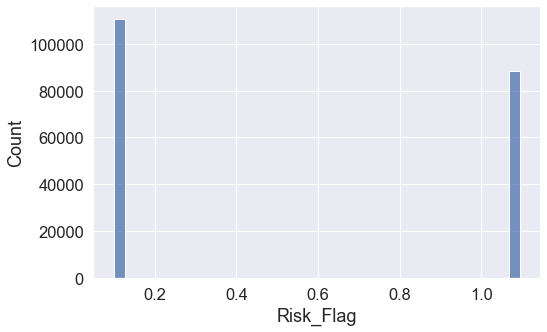

In [89]:
for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns):
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.figure(i, figsize=(8,5))
    _ = sns.histplot(data=strat_train_set[col], shrink=.8)

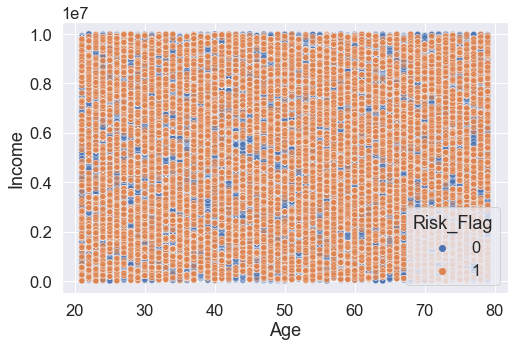

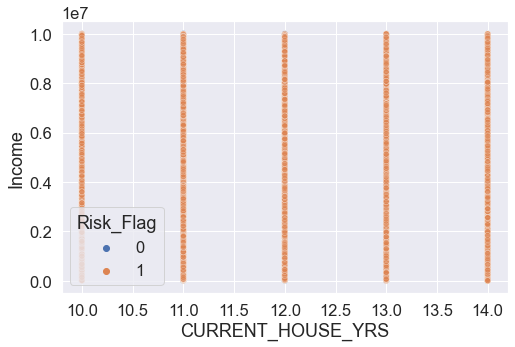

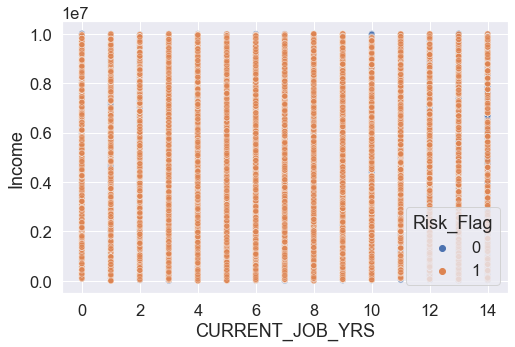

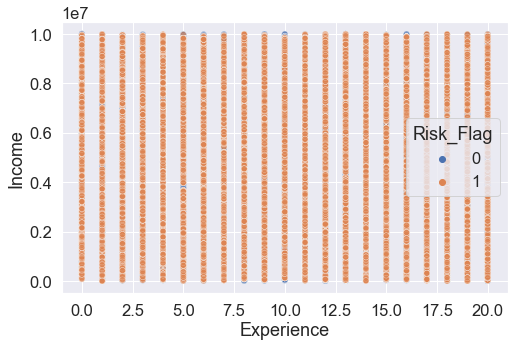

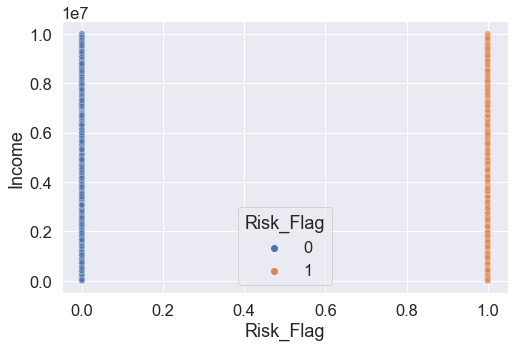

In [90]:
for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns.difference(['Income'])):
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.figure(i, figsize=(8,5))
    _ = sns.scatterplot(data=strat_train_set, x=col, y='Income', hue='Risk_Flag', alpha=0.4)

In [91]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,70,11,4,yes,4,rented,6001312,single,0
1,30,11,2,yes,2,rented,859890,single,0
2,59,10,12,no,12,rented,6220997,single,0
3,45,10,4,yes,14,rented,1363933,single,0
4,68,10,7,no,7,rented,6402349,single,0


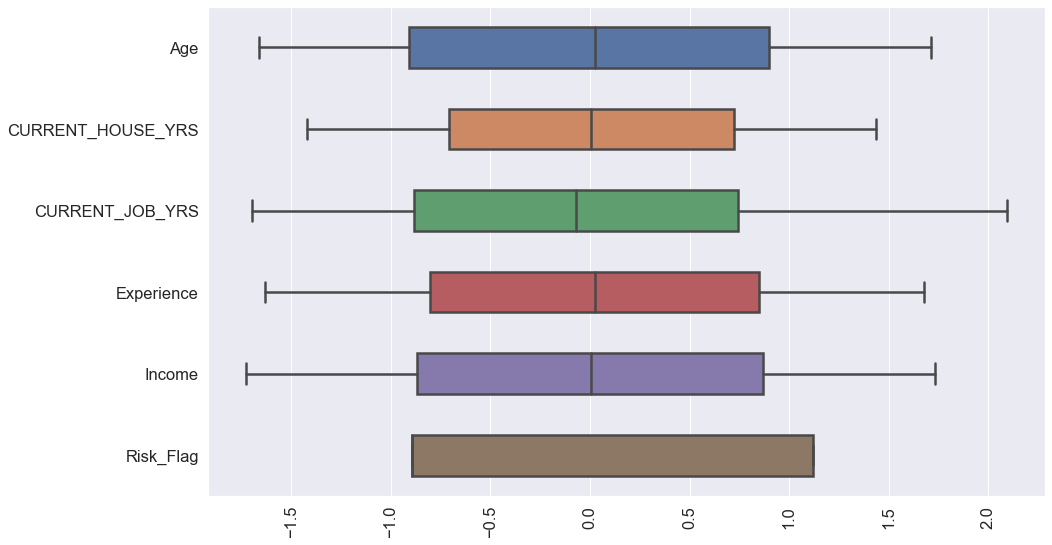

In [92]:
# scaling dataset now just for better visualization
temp_scaler = StandardScaler()
scaled_df = pd.DataFrame(temp_scaler.fit_transform(strat_train_set.copy().select_dtypes(exclude='string')), columns=strat_train_set.select_dtypes(exclude='string').columns)


plt.figure(figsize=(15,9))
_ = sns.boxplot(data=scaled_df, width=0.5, orient='h')
plt.xticks(rotation=90)
plt.show()

In [93]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Experience'])

0

In [94]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Age'])

0

In [95]:
np.sum(strat_train_set['CURRENT_HOUSE_YRS'] > strat_train_set['Age'])

0

In [96]:
np.sum(strat_train_set['Experience'] > strat_train_set['Age'])

0

In [97]:
np.sum((strat_train_set['Age'] - strat_train_set['Experience']) < 14)

15609

In [98]:
len(strat_train_set)

198902

In [99]:
198902 - 15501

183401

In [100]:
strat_train_set.drop(strat_train_set[(strat_train_set['Age'] - strat_train_set['Experience']) < 14].index, inplace=True)

len(strat_train_set)

183293

In [101]:
# strat_train_set["Income_cats"] = pd.cut(strat_train_set["Income"],
# bins=np.array([0., .25, .5, .75, 1.])*1e7,
# labels=['income_low', 'income_avg', 'income_high', 'income_very_high']).astype('string')

In [102]:
def age(row):
    if row['Age'] >= 19 and row['Age'] < 30:
        val = 'age_cat_one'
    elif row['Age'] >= 30 and row['Age'] < 45:
        val = 'age_cat_two'
    elif row['Age'] >= 45 and row['Age'] < 65:
        val = 'age_cat_three'
    else:
        val = 'age_cat_four'
    
    return val

########################################################

def exp(row):
    if row['Experience'] <= 5:
        val = 'exp_cat_one'
    elif row['Experience'] >= 6 and row['Experience'] <= 10:
        val = 'exp_cat_two'
    elif row['Experience'] >= 11 and row['Experience'] <= 15:
        val = 'exp_cat_three'
    else:
        val = 'exp_cat_four'
    
    return val

In [103]:
strat_train_set['Age_cats'] = strat_train_set.apply(age, axis=1)
strat_train_set['Exp_cats'] = strat_train_set.apply(exp, axis=1)

In [104]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag,Age_cats,Exp_cats
0,70,11,4,yes,4,rented,6001312,single,0,age_cat_four,exp_cat_one
1,30,11,2,yes,2,rented,859890,single,0,age_cat_two,exp_cat_one
2,59,10,12,no,12,rented,6220997,single,0,age_cat_three,exp_cat_three
3,45,10,4,yes,14,rented,1363933,single,0,age_cat_three,exp_cat_three
4,68,10,7,no,7,rented,6402349,single,0,age_cat_four,exp_cat_two


In [105]:
# strat_train_set.Income_cats.value_counts()

In [106]:
strat_train_set = strat_train_set.convert_dtypes()

In [107]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183293 entries, 0 to 198901
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                183293 non-null  Int64 
 1   CURRENT_HOUSE_YRS  183293 non-null  Int64 
 2   CURRENT_JOB_YRS    183293 non-null  Int64 
 3   Car_Ownership      183293 non-null  string
 4   Experience         183293 non-null  Int64 
 5   House_Ownership    183293 non-null  string
 6   Income             183293 non-null  Int64 
 7   Married/Single     183293 non-null  string
 8   Risk_Flag          183293 non-null  Int64 
 9   Age_cats           183293 non-null  string
 10  Exp_cats           183293 non-null  string
dtypes: Int64(6), string(5)
memory usage: 17.8 MB


In [108]:
strat_train_set_cats = strat_train_set.select_dtypes('string')

In [109]:
cat_encoder = OneHotEncoder()
strat_train_set_cats_1hot = cat_encoder.fit_transform(strat_train_set_cats)

In [110]:
cat_encoder.get_feature_names()

array(['x0_no', 'x0_yes', 'x1_norent_noown', 'x1_owned', 'x1_rented',
       'x2_married', 'x2_single', 'x3_age_cat_four', 'x3_age_cat_one',
       'x3_age_cat_three', 'x3_age_cat_two', 'x4_exp_cat_four',
       'x4_exp_cat_one', 'x4_exp_cat_three', 'x4_exp_cat_two'],
      dtype=object)

In [111]:
strat_train_set_cats_1hot = pd.DataFrame(strat_train_set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

In [112]:
strat_train_set_cats_1hot.head()

,x0_no,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_married,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1


In [113]:
strat_train_set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

In [114]:
strat_train_set_cats_1hot.head()

,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,1,0,0,1,1,1,0,0,0,0,1,0,0
1,1,0,0,1,1,0,0,0,1,0,1,0,0
2,0,0,0,1,1,0,0,1,0,0,0,1,0
3,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,1,1,1,0,0,0,0,0,0,1


In [115]:
strat_train_set.drop(strat_train_set_cats.columns, axis=1, inplace=True)

In [116]:
strat_train_set = pd.DataFrame(np.c_[strat_train_set, strat_train_set_cats_1hot], columns=list(strat_train_set.columns) + list(strat_train_set_cats_1hot.columns))

In [117]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,70,11,4,4,6001312,0,1,0,0,1,1,1,0,0,0,0,1,0,0
1,30,11,2,2,859890,0,1,0,0,1,1,0,0,0,1,0,1,0,0
2,59,10,12,12,6220997,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,45,10,4,14,1363933,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,68,10,7,7,6402349,0,0,0,0,1,1,1,0,0,0,0,0,0,1


In [118]:
strat_train_set = strat_train_set.convert_dtypes()

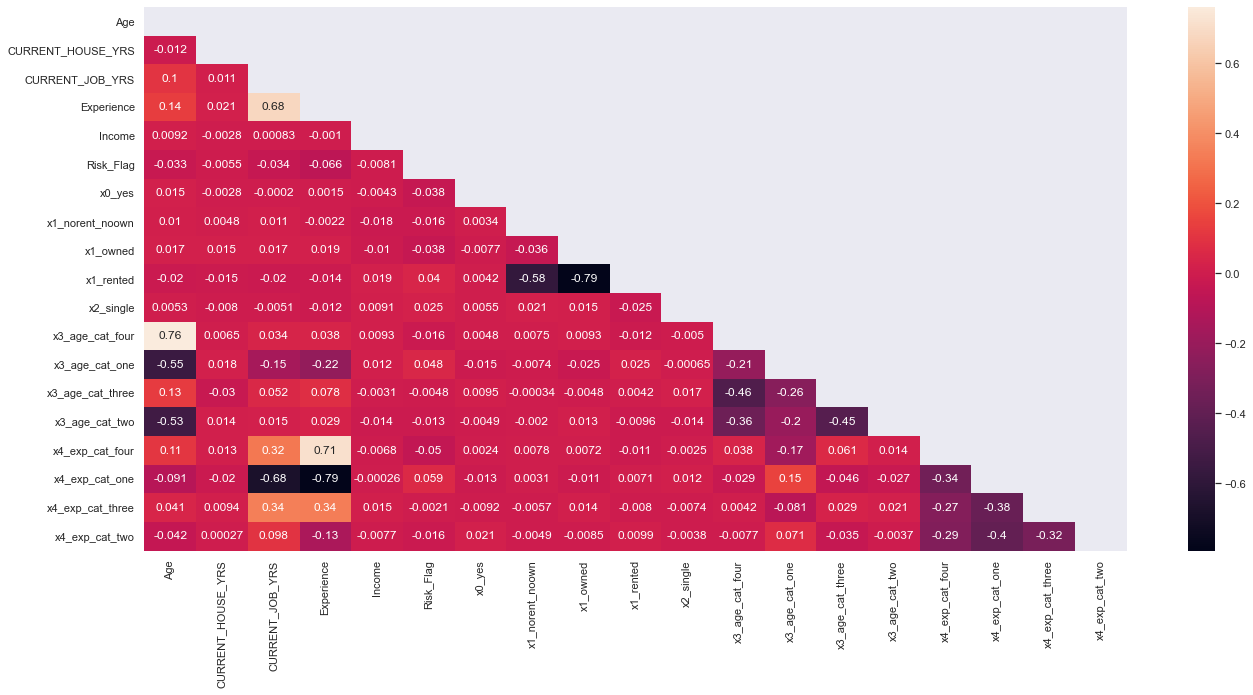

In [119]:
corr = strat_train_set.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.set()
plt.figure(figsize=(22,10))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

In [120]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,70,11,4,4,6001312,0,1,0,0,1,1,1,0,0,0,0,1,0,0
1,30,11,2,2,859890,0,1,0,0,1,1,0,0,0,1,0,1,0,0
2,59,10,12,12,6220997,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,45,10,4,14,1363933,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,68,10,7,7,6402349,0,0,0,0,1,1,1,0,0,0,0,0,0,1


In [121]:
strat_train_set['Income'] = strat_train_set['Income']/1e6

In [122]:
train_set_prepared = strat_train_set.copy()

In [123]:
def preprocessing_pipeline(data_set):
  
    data_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)
    data_set = data_set.convert_dtypes()

    c1 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Experience']].index
    c2 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Age']].index
    c3 = data_set[data_set['CURRENT_HOUSE_YRS'] > data_set['Age']].index
    c4 = data_set[data_set['Experience'] > data_set['Age']].index
    c5 = data_set[(data_set['Age'] - data_set['Experience']) < 14].index

    data_set.drop(set(list(c1)+list(c2)+list(c3)+list(c4)+list(c5)), inplace=True)

    data_set['Age_cats'] = data_set.apply(age, axis=1)
    data_set['Exp_cats'] = data_set.apply(exp, axis=1)

    data_set = data_set.convert_dtypes()

    set_cats = data_set.select_dtypes('string')
    set_cats = set_cats[["Car_Ownership", "House_Ownership", "Married/Single",	"Age_cats",	"Exp_cats"]]
    set_cats_1hot = cat_encoder.transform(set_cats)

    set_cats_1hot = pd.DataFrame(set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

    set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

    data_set.drop(set_cats.columns, axis=1, inplace=True)

    data_set = pd.DataFrame(np.c_[data_set, set_cats_1hot], columns=list(data_set.columns) + list(set_cats_1hot.columns))

    data_set = data_set.convert_dtypes()

    data_set['Income'] = data_set['Income']/1e6

    return data_set

In [124]:
strat_valid_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [125]:
strat_valid_set.duplicated().sum()

0

In [126]:
valid_set_prepared = preprocessing_pipeline(strat_valid_set)

In [127]:
valid_set_prepared.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,1.695876,58,6,6,13,0,1,0,0,1,1,0,0,1,0,0,0,0,1
1,3.42301,74,3,3,10,0,1,0,0,1,1,1,0,0,0,0,1,0,0
2,9.685641,63,5,5,12,0,0,0,0,1,1,0,0,1,0,0,1,0,0
3,4.806341,79,3,3,13,0,0,0,0,1,1,1,0,0,0,0,1,0,0
4,0.195009,79,15,4,14,1,1,0,0,1,1,1,0,0,0,0,0,1,0


In [128]:
train_set_prepared.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,70,11,4,4,6.001312,0,1,0,0,1,1,1,0,0,0,0,1,0,0
1,30,11,2,2,0.85989,0,1,0,0,1,1,0,0,0,1,0,1,0,0
2,59,10,12,12,6.220997,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,45,10,4,14,1.363933,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,68,10,7,7,6.402349,0,0,0,0,1,1,1,0,0,0,0,0,0,1


# **Task2: Regression**

In [129]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error

> ## **Choosing best features for classification**

In [130]:
X_train = train_set_prepared[train_set_prepared.columns.difference(['Income'])]
y_train = train_set_prepared['Income'].astype('float')

X_valid = valid_set_prepared[valid_set_prepared.columns.difference(['Income'])]
y_valid = valid_set_prepared['Income'].astype('float')

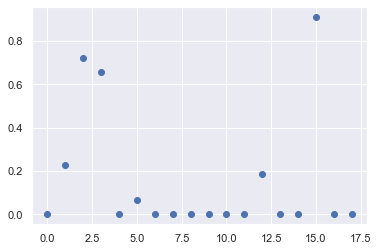

In [131]:
selector = SelectKBest(f_regression, k=1) # selecting one feature
x_temp = selector.fit_transform(X_train, y_train)

cols = X_train.columns[selector.get_support()]
X_train_trans = pd.DataFrame(x_temp, columns=cols) # final output to use

_ = plt.scatter(range(len(list(selector.pvalues_))), list(selector.pvalues_))

# **1) Linear Regression**

In [132]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
linreg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

In [133]:
linreg_model.fit(X_train_trans, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [134]:
linreg_model.best_params_

{'fit_intercept': True, 'normalize': True}

In [135]:
linreg_model.score(X_train_trans, y_train)

0.0003759852185922785

In [136]:
linreg_model.score(X_valid[cols], y_valid)

-7.827215453759528e-05

In [137]:
(mean_squared_log_error(y_valid, linreg_model.predict(X_valid[cols]))*1e6).round(0)

388636.0

#### The model is very bad to be used in regression with the current features.

> ## **Testing model on test_data**

In [138]:
test_set = pd.read_csv('Test Data.csv')

In [139]:
test_set.rename(columns={'ID':'Id'}, inplace=True)

In [140]:
test_set.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [141]:
test_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [142]:
test_set.duplicated().sum()

0

In [143]:
test_set_prepared = preprocessing_pipeline(test_set)

In [144]:
(linreg_model.predict(test_set_prepared[cols])*1e6).round(0)

array([5004971., 5004971., 5004971., ..., 5004971., 5004971., 5004971.])

> ## **Implementation of the algorithm**

In [145]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()

def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [146]:
trial = gradient_descent(ssr_gradient, X_train_trans.iloc[:3000,0], y_train[:3000], [0,0], 0.05, 1000)

In [147]:
y_pred = trial[0] + trial[1] * X_train_trans.iloc[:3000,0]

R2_score(y_train[:3000], y_pred)

-0.000895524493136346

In [148]:
y_pred = trial[0] + trial[1] * X_valid.iloc[:3000,0]

R2_score(y_valid[:3000], y_pred)

-33.14772513645974

#### This implementation takes too much time to run so I took a small sample only of train_set and valid_set.

# **2) Multiple Regression**

In [149]:
X_train = train_set_prepared[train_set_prepared.columns.difference(['Income'])]
y_train = train_set_prepared['Income'].astype('float')

X_valid = valid_set_prepared[valid_set_prepared.columns.difference(['Income'])]
y_valid = valid_set_prepared['Income'].astype('float')

In [150]:
selector = SelectKBest(f_regression, k=4) # selecting many features
x_temp = selector.fit_transform(X_train, y_train)

cols = X_train.columns[selector.get_support()]
X_train_trans = pd.DataFrame(x_temp, columns=cols) # final output to use

In [151]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
multireg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

In [152]:
multireg_model.fit(X_train_trans, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [153]:
multireg_model.best_params_

{'fit_intercept': True, 'normalize': True}

In [154]:
multireg_model.score(X_train_trans, y_train)

0.0008799359406097551

In [155]:
multireg_model.score(X_valid[cols], y_valid)

0.0007919029351760587

In [156]:
(mean_squared_log_error(y_valid, multireg_model.predict(X_valid[cols]))*1e6).round(0)

388361.0

#### Better results and better error score than simple linear regression (error decreased but not too much)

> ## **Testing model on test_data**

In [157]:
(multireg_model.predict(test_set_prepared[cols])*1e6).round(0)

array([5005804., 5005804., 5108384., ..., 5005804., 5108384., 4909372.])

> ## **Implementation of the algorithm**

In [158]:
def ssr_gradient(x, y, b):
    res = x.dot(b) - y
    return (np.array(res).T*np.array(x.T)).mean(axis=1).reshape(-1,1)


def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
    # cost_history = [0] * n_iter
    vector = start
    for itr in range(n_iter):
        diff = -learn_rate * gradient(x, y, vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector


def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [159]:
x = np.matrix(X_train_trans).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.matrix(y_train).T

b = np.matrix(np.zeros(x.shape[1])).T

trial = gradient_descent(ssr_gradient, x, y, b)

In [160]:
y_pred = x.dot(trial)

In [161]:
R2_score(np.array(y.tolist()), np.array(y_pred.tolist()))

-0.029492800510678485

In [162]:
x = np.matrix(X_valid[cols]).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.matrix(y_valid).T

y_pred = x.dot(trial)
R2_score(np.array(y.tolist()), np.array(y_pred.tolist()))

-0.03565628626039019

#### it gave bad results because of initialization values of b

# **3) Polynomial Regression**

In [163]:
results, errors = [], []

for inter in [True, False]:
    
    for deg in [2, 4, 6, 8]:
    
        polyf = PolynomialFeatures(degree=deg, interaction_only=inter)
        x_tempo = polyf.fit_transform(X_train_trans)

        parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
        polyreg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

        polyreg_model.fit(x_tempo, y_train)
        x_val_tempo = polyf.transform(X_valid[cols])
        error = (mean_squared_log_error(y_valid, polyreg_model.predict(x_val_tempo))*1e6).round(0)

        results.append((inter, deg, polyreg_model.best_params_))
        errors.append(error)

In [164]:
target_index = errors.index(min(errors))
print(results[target_index], errors[target_index])

(False, 4, {'fit_intercept': False, 'normalize': True}) 387520.0


In [165]:
polyfinal = PolynomialFeatures(degree=8, interaction_only=False)
x_tempo = polyfinal.fit_transform(X_train_trans)
polyreg_model_final = LinearRegression(False, True)
polyreg_model_final.fit(x_tempo, y_train)
x_val_tempo = polyfinal.transform(X_valid[cols])

print((mean_squared_log_error(y_valid, polyreg_model_final.predict(x_val_tempo))*1e6).round(0))

/home/mnasser/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fit_intercept=False, normalize=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


388016.0


#### Tried various parameters to get the lowest error. It slightly decreased by polynomial regression compared to multiple regression.

> ## **Testing model on test_data**

In [166]:
x_test_tempo = polyfinal.transform(test_set_prepared[cols])
(polyreg_model_final.predict(x_test_tempo)*1e6).round(0)

array([5002686., 5002686., 5154968., ..., 5002686., 5155212., 4938721.])

# **4) Support Vector Regressor**

In [167]:
parameters = {'kernel': ['rbf', 'linear', 'poly'], 'gamma': ['auto', 'scale'], 'degree': [2, 3, 4], 'C': [1, 10]}
svr_model = GridSearchCV(SVR(), parameters, scoring='r2')

In [168]:
svr_model.fit(X_train_trans.iloc[:5000,:], y_train[:5000])

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'degree': [2, 3, 4],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='r2')

In [169]:
svr_model.best_params_

{'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}

In [170]:
svr_model.score(X_train_trans.iloc[:5000,:], y_train[:5000])

-0.0006281292283139006

In [171]:
svr_model.score(X_valid[cols].iloc[:1000,:], y_valid[:1000])

0.0006615388731942007

In [172]:
(mean_squared_log_error(y_valid[:1000], svr_model.predict(X_valid[cols].iloc[:1000,:]))*1e6).round(0)

423842.0

#### The model takes too much time to run so I used a small sample of data to run and it gave bad results due to this approach as the error increased.

> ## **Testing model on test_data**

In [173]:
(svr_model.predict(test_set_prepared[cols])*1e6).round(0)

array([5012853., 5012853., 5223542., ..., 5012853., 5223542., 5001535.])

### Polynomial Regression is the best models according to error value and SVR is the worst but all is bad according to accuracy or for regression overall.